# SAT & ACT Participation Analysis

## Problem Statement

The problem of low SAT participation rates in various states has an impact on the profits of our College board, we will be to looking to identify and provide a solutions to increase the participation rates.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [5]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [7]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [8]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [10]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

For SAT, it contain 51 entries and 5 colunms; 'State', 'Participation', 'Evidence-Based Reading' and 'Writing', 'Math' and 'Total'. Where 'Total' is the sum of 'Evidence-Based Reading and Writing' and 'Math' scores.


ACT data has 52 entries and 7 columns; 'State', 'Participation', 'English',	'Math',	'Reading', 'Science' and 'Composite'.

#### 4a. Does the data look complete? 

Data looks complete, but not clean. There seems to have duplicates data based on the number of entries which require futher investigation. However there are no missing values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Yes there are some errors observed in both SAT and ACT data.

In SAT the minimum value found was 52 in the Math column. Based on the IQR and Mean of the Math scores, it is unlikely that the (Maryland) state's average score for Math to be so much lower than the country wide mean score of 547. I assume this might be due to human error and require further investigation.

In ACT the minimum value found was 2.3 in the Science column which again is from Maryland. I can safely conclude that there might have error with the data from Maryland which require further investigation. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

Based on the articles above, the data for Maryland is indeeed incorrect. SAT score for math is 524 instead of 52 and ACT math score is 22.3 instead of 2.3. 

In [11]:
#code
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524

In [12]:
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 22.3

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#display datatype 
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [14]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Participation is a continunous variable and should be in float64 for both SAT and ACT data. Composite should be float64 as well for ACT data. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#create a fuction to remove the % and set it to float
def rates_conversion(rates):
    return float(rates.replace('%',''))/100   

In [16]:
#using apply method to change remove the % and change dtype to float
sat_2017['Participation'] = sat_2017['Participation'].apply(rates_conversion)

In [17]:
act_2017['Participation'] = act_2017['Participation'].apply(rates_conversion)

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#remove the string x from the data and set dtype to float
act_2017['Composite'] = act_2017['Composite'].str.replace('x', '')


In [19]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [20]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [21]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#create a dictionary to store the names

new_sat_col_name_2017 = {
    'State': 'state',
    'Math': 'sat_2017_math',
    'Evidence-Based Reading and Writing': 'sat_2017_read_write',
    'Total': 'sat_2017_total',
    'Participation': 'sat_2017_participation'
}
sat_2017.rename(columns=new_sat_col_name_2017, inplace=True)

In [26]:
sat_2017.head()

,state,sat_2017_participation,sat_2017_read_write,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [24]:
new_act_col_name_2017 = {
    'State': 'state',
    'Participation': 'act_2017_participation',
    'English': 'act_2017_english',
    'Math': 'act_2017_math',
    'Reading': 'act_2017_read',
    'Science': 'act_2017_science',
    'Composite': 'act_2017_composite'
}

act_2017.rename(columns=new_act_col_name_2017, inplace=True)

In [27]:
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT/ACT|The participating states| 
|**sat_2017_participation**|*float*|SAT 2017|The percentage(decimal) of SAT 2017 pariticipation rate|
|**sat_2017_read_write**|*integer*|SAT 2017|The average score for SAT 2017 Evidence-Based Reading and Writing (200-800)| 
|**sat_2017_math**|*integer*|SAT 2017|The average score for SAT 2017 Math (200-800)| 
|**sat_2017_total**|*integer*|SAT 2017|The total SAT 2017 score for Math and Evidence-Based Reading and Writing (400-1600)|
|**act_2017_participation**|*float*|ACT 2017|The percentage(decimal) of ACT 2017 pariticipation rate|
|**act_2017_english**|*float*|ACT 2017|The scaled score for ACT 2017 English (1-36)| 
|**act_2017_math**|*float*|ACT 2017|The scaled score for ACT 2017 Math (1-36)| 
|**act_2017_read**|*float*|ACT 2017|The scaled score for ACT 2017 Reading (1-36) | 
|**act_2017_science**|*float*|ACT 2017|The scaled score for ACT 2017 Science (1-36) | 
|**act_2017_composite**|*float*|ACT 2017|The Composite(average) score for ACT 2017(1-36) | 
|**sat_2018_participation**|*float*|SAT 2018|The percentage(decimal) of SAT 2018 pariticipation rate|
|**sat_2018_read_write**|*integer*|SAT 2018|The average score for SAT 2018 Evidence-Based Reading and Writing (200-800)| 
|**sat_2018_math**|*integer*|SAT 2018|The average score for SAT 2018 Math (200-800)| 
|**sat_2018_total**|*integer*|SAT 2018|The total SAT 2017 score for Math and Evidence-Based Reading and Writing (400-1600)|
|**act_2018_participation**|*float*|ACT 2018|The percentage(decimal) of ACT 2018 pariticipation rate|
|**act_2018_composite**|*float*|ACT 2018|The Composite(average) score for ACT 2018(1-36) | 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [28]:
#drop national row
act_2017.drop([0], inplace=True) 
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
merged_act_sat_2017 = act_2017.merge(sat_2017, on='state', how='inner')

In [30]:
merged_act_sat_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_read_write,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [32]:
merged_act_sat_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [33]:
#import data
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [34]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [35]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [36]:
#act_2018 has 52 entries, check if there's any duplication

act_2018[act_2018.duplicated()]

,State,Participation,Composite
20,Maine,7%,24.0


In [37]:
#drop the duplicate row in ACT
act_2018.drop_duplicates(inplace=True)

In [38]:
#convert the SAT participation rates from object to float using the function created earlier
sat_2018['Participation'] = sat_2018['Participation'].apply(rates_conversion)


In [39]:
#convert the ACT participation rates from object to float using the function created earlier
act_2018['Participation'] = act_2018['Participation'].apply(rates_conversion)

In [40]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [41]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [42]:
#rename the columns for sat 2018
new_sat_col_name_2018 = {
    'State': 'state',
    'Math': 'sat_2018_math',
    'Evidence-Based Reading and Writing': 'sat_2018_read_write',
    'Total': 'sat_2018_total',
    'Participation': 'sat_2018_participation'
}
sat_2018.rename(columns=new_sat_col_name_2018, inplace=True)


In [43]:
#rename the columns for act 2018
new_act_col_name_2018 = {
    'State': 'state',
    'Participation': 'act_2018_participation',
    'Composite': 'act_2018_composite'
}

act_2018.rename(columns=new_act_col_name_2018, inplace=True)

In [44]:
#rename the District of columbia to District of Columbia

act_2018.loc[8, 'state'] = 'District of Columbia'

In [45]:
act_2018.head(10)

,state,act_2018_participation,act_2018_composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of Columbia,0.32,23.6
9,Florida,0.66,19.9


In [46]:
#merged the data for sat_2018 and act_2018
merged_act_sat_2018 = act_2018.merge(sat_2018, how='inner', on='state')

In [47]:
merged_act_sat_2018.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_read_write,sat_2018_math,sat_2018_total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [48]:
#save the sat/act 2018 date to .csv
merged_act_sat_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [49]:
#merge 2017 and 2018 data
final_sat_act = merged_act_sat_2017.merge(merged_act_sat_2018, how='inner', on='state')

In [51]:
#save data to final.csv
final_sat_act.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_read,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.433333,1.725766,18.20,19.950,21.30,22.750,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_read_write,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [54]:
#create the standard deviation function
def standard_deviation(l):
    total = 0
    avg = sum(l)/len(l) #get the mean value
    
    for i in range(len(l)): 
        total += (l[i] - avg)**2
    
    total = (total/len(l))**0.5
           
    return total

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [77]:
sd = {col:standard_deviation(final_sat_act[col]) for col in final_sat_act.columns if col != 'state'}
sd

{'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_read': 2.0469029314842646,
 'act_2017_science': 1.7087624998945146,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 0.3492907076664507,
 'sat_2017_read_write': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_read_write': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Manually calculated standard deviations does not match up with the output from pandas descibe. However it's the same with numpy std method. This is because pd.DataFrame.std assumes 1 degree of freedom by default, also known as sample standard deviation and numpy.std assumes 0 degree of freedom by default, also known as population standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [110]:
def max_func(df, col):
    mask = df[col].max()
    return df[['state', col]][df[col]==mask].sort_values(by='state', ascending=True)

In [111]:
def min_func(df, col):
    mask = df[col].min()
    return df[['state', col]][df[col]==mask].sort_values(by='state', ascending=True)

In [113]:
#display highest participation rates in 2017 ACT
max_func(final_sat_act, 'act_2017_participation')

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


In [114]:
#display lowest participation rates in 2017 ACT
min_func(final_sat_act, 'act_2017_participation')

,state,act_2017_participation
19,Maine,0.08


In [115]:
#display highest participation rates in 2017 SAT
max_func(final_sat_act, 'sat_2017_participation')

,state,sat_2017_participation
6,Connecticut,1.0
7,Delaware,1.0
8,District of Columbia,1.0
22,Michigan,1.0


In [116]:
#display lowest participation rates in 2017 SAT
min_func(final_sat_act, 'sat_2017_participation')

,state,sat_2017_participation
15,Iowa,0.02
24,Mississippi,0.02
34,North Dakota,0.02


In [117]:
#display highest participation rates in 2018 ACT
max_func(final_sat_act, 'act_2018_participation')

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


In [119]:
#display lowest participation rates in 2018 ACT
min_func(final_sat_act, 'act_2018_participation')

,state,act_2018_participation
19,Maine,0.07


In [120]:
#display highest participation rates in 2018 SAT
max_func(final_sat_act, 'sat_2018_participation')

,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0


In [121]:
#display lowest participation rates in 2018 SAT
min_func(final_sat_act, 'sat_2018_participation')

,state,sat_2018_participation
34,North Dakota,0.02


In [122]:
#display highest composite score in 2017 ACT
max_func(final_sat_act, 'act_2017_composite')

,state,act_2017_composite
29,New Hampshire,25.5


In [123]:
#display lowest composite score in 2017 ACT
min_func(final_sat_act, 'act_2017_composite')

,state,act_2017_composite
28,Nevada,17.8


In [125]:
#display highest total score in 2017 SAT
max_func(final_sat_act, 'sat_2017_total')

,state,sat_2017_total
23,Minnesota,1295


In [126]:
#display lowest total score in 2017 SAT
min_func(final_sat_act, 'sat_2017_total')

,state,sat_2017_total
8,District of Columbia,950


In [127]:
#display highest composite score in 2018 ACT
max_func(final_sat_act, 'act_2018_composite')

,state,act_2018_composite
6,Connecticut,25.6


In [128]:
#display lowest composite score in 2018 ACT
min_func(final_sat_act, 'act_2018_composite')

,state,act_2018_composite
28,Nevada,17.7


In [130]:
#display highest total score in 2018 SAT
max_func(final_sat_act, 'sat_2018_total')

,state,sat_2018_total
23,Minnesota,1298


In [131]:
#display lowest total score in 2018 SAT
min_func(final_sat_act, 'sat_2018_total')

,state,sat_2018_total
8,District of Columbia,977


In [257]:
def p_rate_changes(df, rate2017, rate2018):
    highest_2017_prates = set(max_func(df, rate2017)['state'])
    highest_2018_prates = set(max_func(df, rate2018)['state'])
    diff_2017 = highest_2017_prates - highest_2018_prates
    diff_2018 = highest_2018_prates - highest_2017_prates
    diff_2017.update(diff_2018)
    filter_df = df[['state', rate2017, rate2018]]
    return filter_df[filter_df['state'].isin(diff_2017)]
    

In [261]:
#display states with 100% participation on a ACT that 
#have a rate change year-to-year
p_rate_changes(final_sat_act, 'act_2017_participation', 'act_2018_participation')

,state,act_2017_participation,act_2018_participation
5,Colorado,1.00,0.30
23,Minnesota,1.00,0.99
27,Nebraska,0.84,1.00
35,Ohio,0.75,1.00


In [262]:
#display states with 100% participation on a SAT that 
#have a rate change year-to-year
p_rate_changes(final_sat_act, 'sat_2017_participation', 'sat_2018_participation')

,state,sat_2017_participation,sat_2018_participation
5,Colorado,0.11,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

# Correlation heatmap 

In [265]:
def plot_heatmap(df):
    
    plt.figure(figsize=(10,8))
    plt.title('Correlation among all features')
    sns.heatmap(final_sat_act.corr(), linewidths=1, cmap="Blues", annot=True);


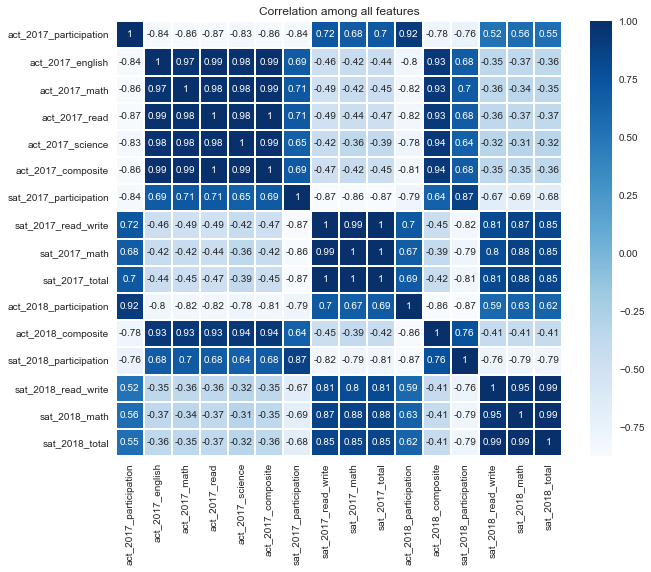

In [266]:
plot_heatmap(final_sat_act)

Total/Composite Scores on a given test are highly negatively correlated with participation rate on that test (r ~ -0.8). Lower participation means higher mean scores, and vice versa, due to students getting higher scores on average.

Total/Composite Scores on a given test are highly correlated with score for other section of the test. It shows that if a state that has low participation rate will perform well in the total/composite score, it is likely they do well in all sections of the test. 


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [268]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=10) 
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i], loc='left')
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

# Distributions for ACT and SAT Participation Rates in 2017 and 2018

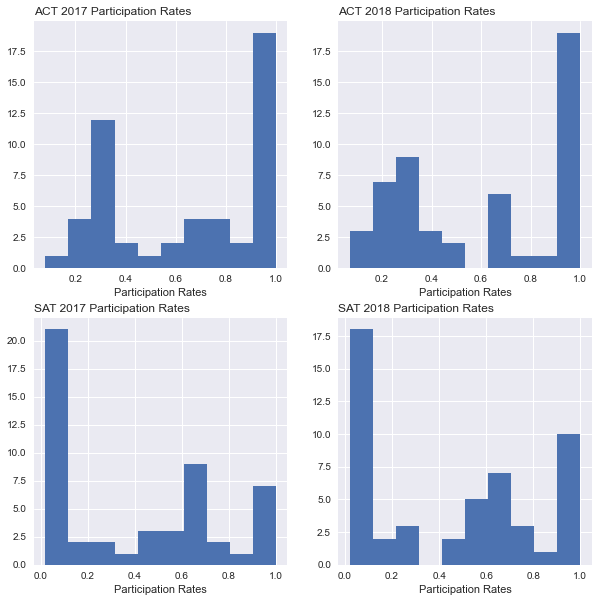

In [269]:
participation_cols = ['act_2017_participation', 'act_2018_participation', 
                      'sat_2017_participation', 'sat_2018_participation']
participation_titles = ['ACT 2017 Participation Rates', 'ACT 2018 Participation Rates',
                        'SAT 2017 Participation Rates', 'SAT 2018 Participation Rates']
participation_xlabels = ['Participation Rates', 'Participation Rates', 
                         'Participation Rates', 'Participation Rates']

subplot_histograms(final_sat_act, participation_cols, participation_titles, participation_xlabels)



The 2017 and 2018 distribution of participation rate for both SAT and ACT are quite similar. You can see that there is a large group of states with near or at 100% and another large group at the range of 20% to 40% participating in the ACT.

By contrast, there is a large group that falls between 0 to 20% in SAT and a cluster of states with participation in the 50-75% range. 

This shows that the distribution for both test are mirroring each other. 



# Histogram for Math Score

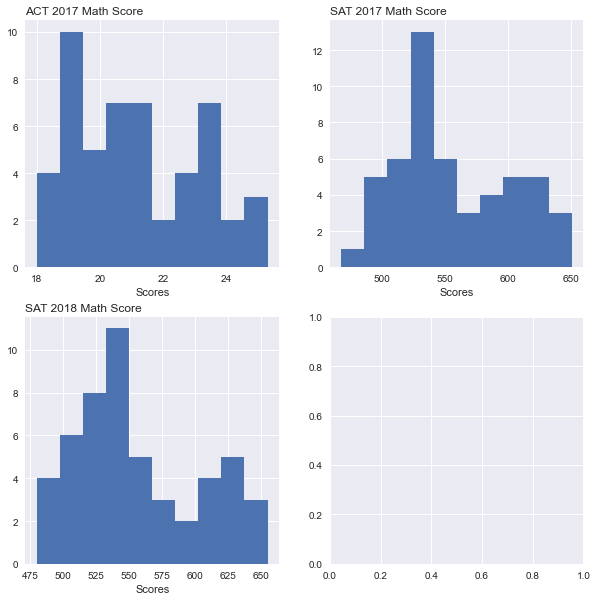

In [270]:
math_cols = ['act_2017_math', 'sat_2017_math', 'sat_2018_math']
math_titles = ['ACT 2017 Math Score', 'SAT 2017 Math Score', 'SAT 2018 Math Score']
math_xlabels = ['Scores', 'Scores', 'Scores']

subplot_histograms(final_sat_act, math_cols, math_titles, math_xlabels)



The distribution for math score between both ACT and SAT is very similar with most group of states fall below the mean(center point). However there is slightly more groups of states scored higher in the range of 22 to 24 for ACT 2017.

# Histogram for Reading/Verbal Score

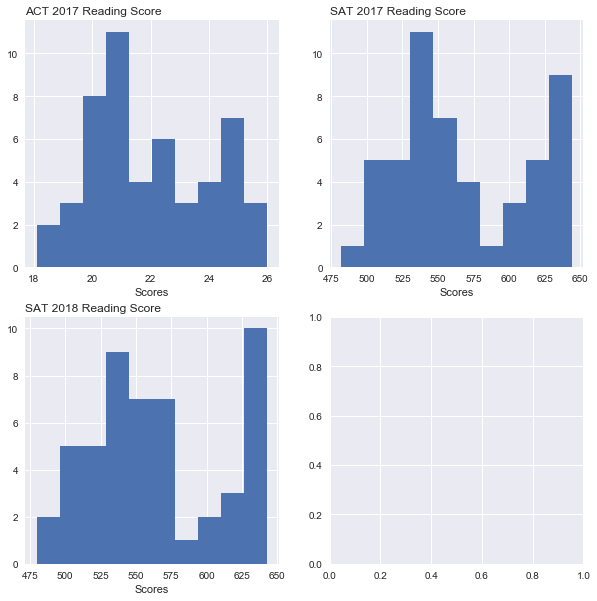

In [163]:
read_verbal_cols = ['act_2017_read', 'sat_2017_read_write', 'sat_2018_read_write']
read_verbal_titles = ['ACT 2017 Reading Score', 'SAT 2017 Reading Score', 'SAT 2018 Reading Score']
read_verbal_xlabels = ['Scores', 'Scores', 'Scores']

subplot_histograms(final_sat_act, read_verbal_cols, read_verbal_titles, read_verbal_xlabels)



The distribution of reading score for both SAT and ACT is very similar. Most states scored below the mean. However there are more groups scored better in SAT than ACT.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


# Scatter plot for SAT vs. ACT math scores for 2017

In [284]:
def plot_scatter(df, x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.regplot(x=x, y=y, data=df)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=18)
    

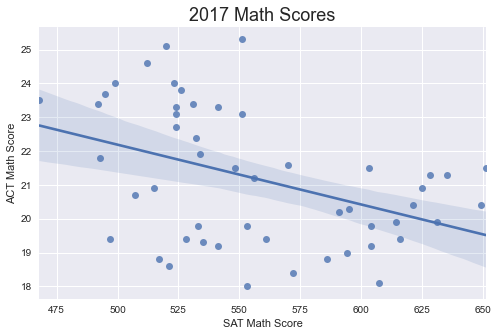

In [285]:
plot_scatter(final_sat_act, 'sat_2017_math', 'act_2017_math', 'SAT Math Score',
            'ACT Math Score', '2017 Math Scores')

There's a weak negative relationship between the SAT and ACT math score in 2017. As the SAT math score higher, the ACT math score decreases. 

# Scatter plot for SAT vs. ACT verbal/reading scores for 2017

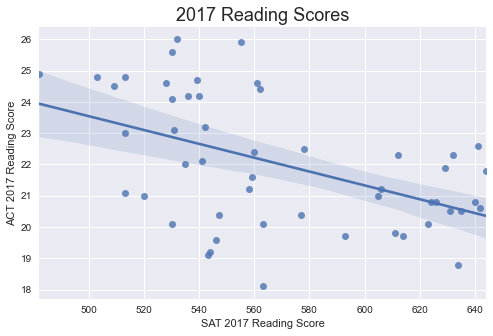

In [286]:
plot_scatter(final_sat_act, 'sat_2017_read_write', 'act_2017_read', 
            'SAT 2017 Reading Score', 'ACT 2017 Reading Score', '2017 Reading Scores')

There's a weak negative relationship between the SAT and ACT reading score in 2017. As the SAT reading score higher, the ACT reading score decreases.

# Scatter plot for SAT vs. ACT total/composite scores for 2017

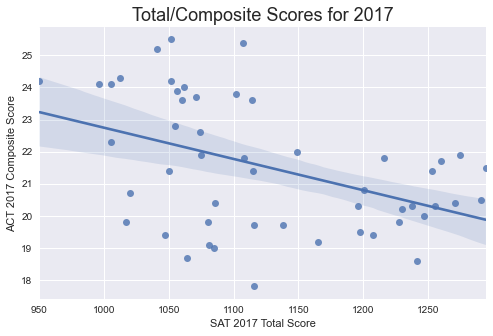

In [287]:
plot_scatter(final_sat_act, 'sat_2017_total', 'act_2017_composite', 
            'SAT 2017 Total Score', 'ACT 2017 Composite Score', 
             'Total/Composite Scores for 2017')

There's a weak negative relationship between the SAT and ACT total score in 2017. As the SAT total score higher, the ACT composite score decreases.

# Scatter plot for Total scores for SAT 2017 vs. 2018

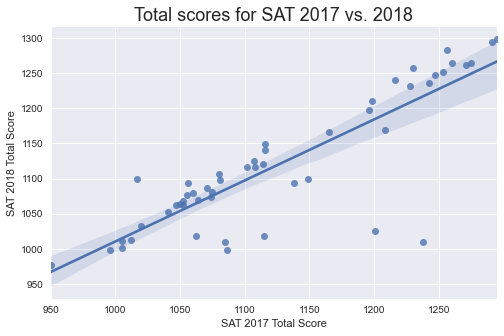

In [288]:
plot_scatter(final_sat_act, 'sat_2017_total', 'sat_2018_total', 
            'SAT 2017 Total Score', 'SAT 2018 Total Score', 
             'Total scores for SAT 2017 vs. 2018')

There's a very strong postive relationship between the SAT total score for 2017 and 2018.

# Scatter plot for Composite scores for ACT 2017 vs. 2018

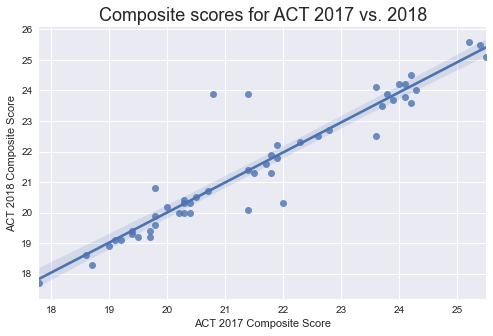

In [289]:
plot_scatter(final_sat_act, 'act_2017_composite', 'act_2018_composite', 
            'ACT 2017 Composite Score', 'ACT 2018 Composite Score', 
             'Composite scores for ACT 2017 vs. 2018')

There's a very strong postive linear relationship between the ACT total score for 2017 and 2018.  

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

# Boxplot analysis

In [299]:
def plot_boxplot(df, list_of_cols):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(data=df[list_of_cols])
    

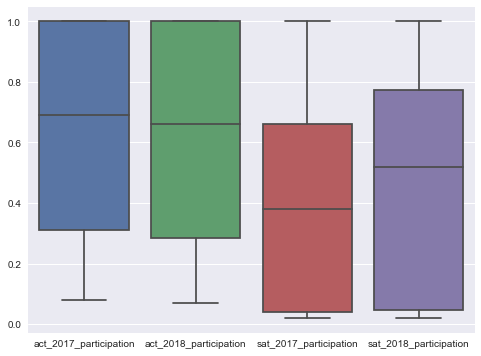

In [300]:
plot_boxplot(final_sat_act, ['act_2017_participation', 'act_2018_participation',
                             'sat_2017_participation', 'sat_2018_participation'] )

It clearly shows that ACT has a higher participation rates for both 2017 and 2018. This is supported by the earlier analysis as well. 

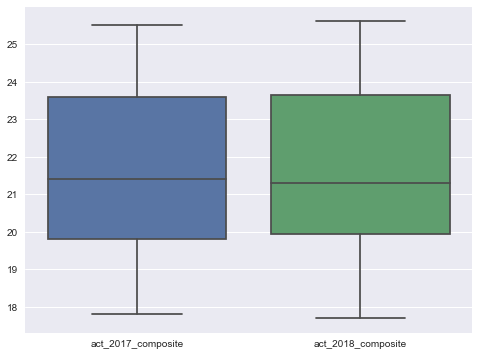

In [301]:
plot_boxplot(final_sat_act, ['act_2017_composite', 'act_2018_composite'] )

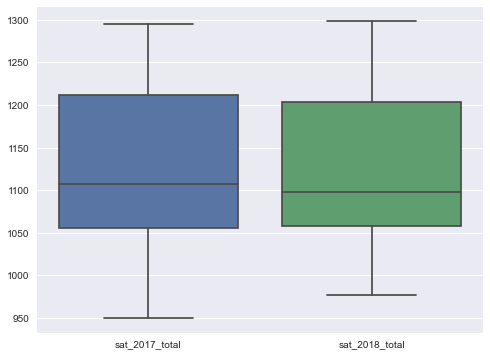

In [302]:
plot_boxplot(final_sat_act, ['sat_2017_total', 'sat_2018_total'] )

As mentioned earlier, the scores for each test does not differ much because of a certain bias caused by the participation rate. The range, IQR and the median is very similar. 

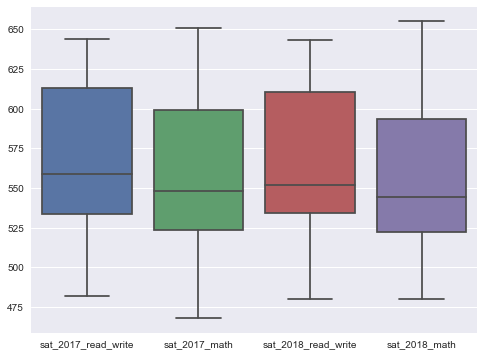

In [303]:
plot_boxplot(final_sat_act, ['sat_2017_read_write', 'sat_2017_math', 
                             'sat_2018_read_write', 'sat_2018_math'] )

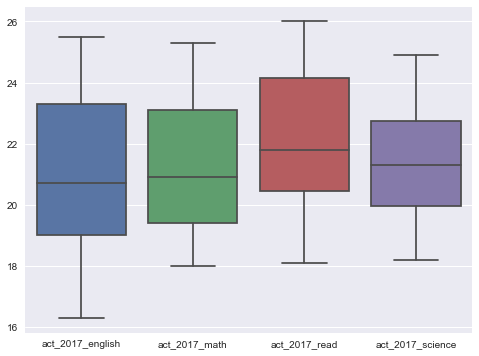

In [305]:
plot_boxplot(final_sat_act, ['act_2017_english', 'act_2017_math', 
                             'act_2017_read', 'act_2017_science'])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

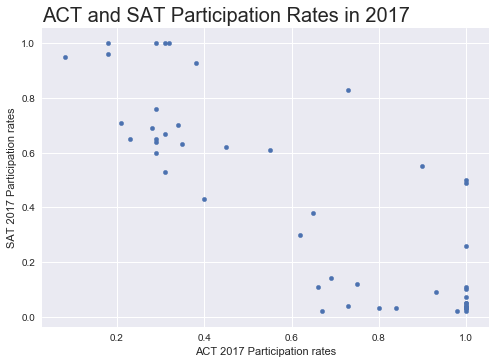

In [189]:
final_sat_act.plot(x='act_2017_participation', y='sat_2017_participation', kind='scatter')
plt.ylabel('SAT 2017 Participation rates')
plt.xlabel('ACT 2017 Participation rates')
plt.title('ACT and SAT Participation Rates in 2017', loc='left', fontsize=20);

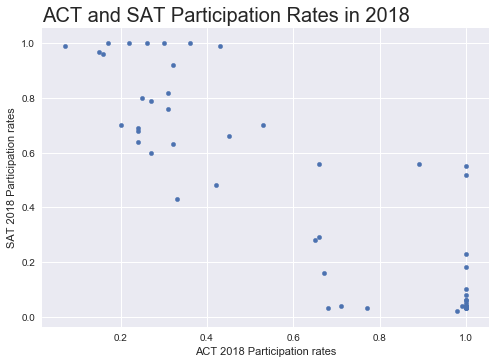

In [195]:
final_sat_act.plot(x='act_2018_participation', y='sat_2018_participation', kind='scatter')
plt.ylabel('SAT 2018 Participation rates')
plt.xlabel('ACT 2018 Participation rates')
plt.title('ACT and SAT Participation Rates in 2018', loc='left', fontsize=20);

There's negative relationship between the ACT and SAT participation rate in both 2017 and 2018. The higher participation in ACT, the lower the participation in SAT. 


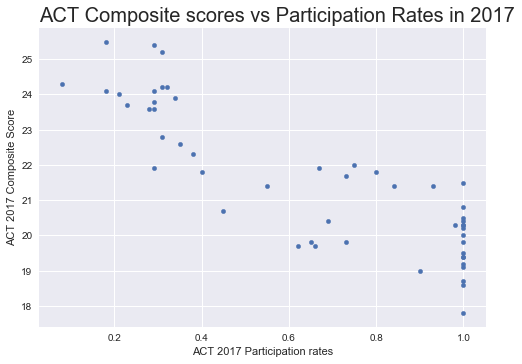

In [174]:
final_sat_act.plot(x='act_2017_participation', y='act_2017_composite', kind='scatter')
plt.ylabel('ACT 2017 Composite Score')
plt.xlabel('ACT 2017 Participation rates')
plt.title('ACT Composite scores vs Participation Rates in 2017', loc='left', fontsize=20);

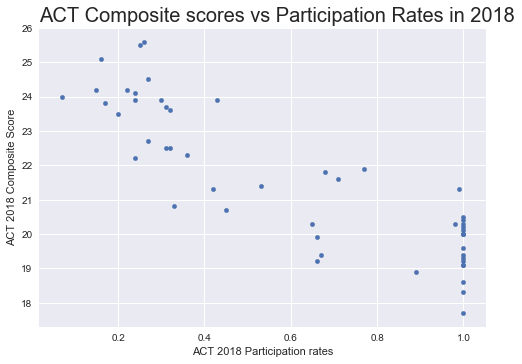

In [175]:
final_sat_act.plot(x='act_2018_participation', y='act_2018_composite', kind='scatter')
plt.ylabel('ACT 2018 Composite Score')
plt.xlabel('ACT 2018 Participation rates')
plt.title('ACT Composite scores vs Participation Rates in 2018', loc='left', fontsize=20);

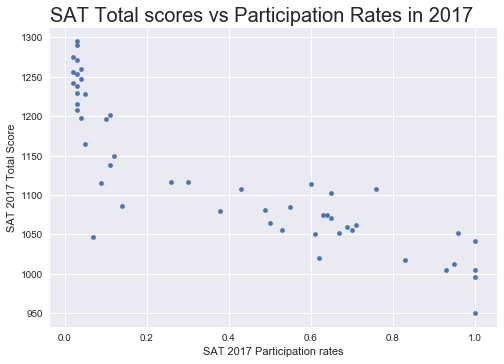

In [176]:
final_sat_act.plot(x='sat_2017_participation', y='sat_2017_total', kind='scatter')
plt.ylabel('SAT 2017 Total Score')
plt.xlabel('SAT 2017 Participation rates')
plt.title('SAT Total scores vs Participation Rates in 2017', loc='left', fontsize=20);

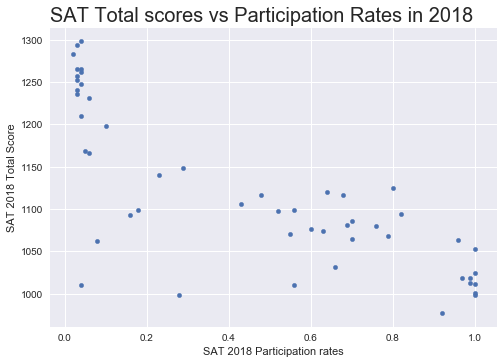

In [177]:
final_sat_act.plot(x='sat_2018_participation', y='sat_2018_total', kind='scatter')
plt.ylabel('SAT 2018 Total Score')
plt.xlabel('SAT 2018 Participation rates')
plt.title('SAT Total scores vs Participation Rates in 2018', loc='left', fontsize=20);

There's a very strong negative relationship between the participation rates and scores. The higher the participation rate, the lower the score. This can be seen in both SAT and ACT. 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [178]:
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_read,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.433333,1.725766,18.20,19.950,21.30,22.750,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_read_write,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


Looking at the table above, we have the mean, median to indicate the center of the distribution, the standard deviation and the IQR(Q3-Q1) indicate the spread or dispersion from the mean. The min and the max indicate the range of distribution and lastly, based on the mean and median we able to identify the skewness of the distribution. When mean is significantly above the median, it suggest right or positively skewed distribution and if the mean is below the median, it will suggest a left or negatively skewed distribution

Participation Rates:

The mean for ACT 2017 and 2018 is 0.6525 and 0.6172 and median of 0.69 and 0.66 indicate that the distribution of the participation rate is slight skewed to the left. It also shows that there's decrease in the mean rate from 2017 to 2018. 

The mean for SAT 2017 and 2018 is 0.398 and 0.4574 respectively. This indicate there's a modest increase in the participation rate from 2017 to 2018. Looking at the quartiles, SAT has a very large IQR compare to ACT. This shows that majority of the states participate between 4% to 70%.  

Scores:

ACT composite scores from both years and ACT section scores (6 categories total) all have simliar means. Std ranging from a minimum of 1.98 to a maximum std of 2.35. IQR for each of the ACT score distributions is about 4 points. And the mean is above the median by between 0.1 and 0.3, suggest a slight right skewed in the distribution.

For SAT, the mean score for Reading is ranging between 563 to 569 for both years and mean score for math remain around 556 for both years. Std is around 45 to 47 for both math and reading. The mean total score drop 10 points from 2017 to 2018.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

From the histogram above we do not observe this trend. The histograms does not seems to be normally distributed. For the distribution for participation rates of ACT in both years seems to be skewed towards left, with large number of states having a 100% participation. As for SAT, the distribution seems to skewed towards right. However, based on Central Limit Theorem, if the sample size is large enough the distribution will approach normal. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

This assumption will only hold for Math and Reading distribution because of the Central Limit Theorem, with large enough sample size, the distribution will approach normal, even the population does not follow normal distribution. However for participation rate distribution is highly skewed due to the states policies.(bias selection)

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

They can't be compared directly as the scoring metric is different. SAT uses the average score and ACT uses a scaled score. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [192]:
all_participation_rates = final_sat_act[['state', 'act_2017_participation', 'act_2018_participation' , 'sat_2017_participation', 'sat_2018_participation']]
all_participation_rates[(all_participation_rates['state'] == 'Colorado') | (all_participation_rates['state'] == 'Illinois') | (all_participation_rates['state'] == 'Oregon')]


,state,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
5,Colorado,1.00,0.30,0.11,1.00
13,Illinois,0.93,0.43,0.09,0.99
37,Oregon,0.40,0.42,0.43,0.48


Colorado and Illinois have a huge increase in SAT participation in 2018. Why? Based on further investigation, I found out that both states have ended their contract with ACT and have switched to SAT hence the increase in SAT participation rates in 2018. 

Oregon is the only state that have participation rate below 50% for both SAT and ACT in both years. Why? Based on further investigation, I found out that the state does not have any mandatory ACT/SAT testing and focus mainly on their own standandized test "SBAC" (or Smarter Balanced Assessment Consortium). This resulted in low participation rate for both SAT and ACT.

Outside Research references: 

https://www.testive.com/colorado-sat-change-2017/

https://www.testive.com/illinois/

https://www.opb.org/news/article/oregon-schools-students-test-scores-2018-2017/

https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on our findings, the high participation rate of each test depends heavily on the state's policies, states with mandatory testing will have high participation. ACT and SAT participation rates tends to mirror each other as the states willl only prefer one over the other.

We also see that the Total/Composite Scores on a given test are highly negatively correlated with participation rate. Lower participation rate means higher mean score and vice versa. This is mainly due to selection bias, when the particular test is not mandatory in the state, only higher achieving students would take up the test and hence a higher average score. 

Although ACT is the preferred testing for most states, but we do see that there's an increase in mean participation rate for SAT from 2017 to 2018. This is mainly because Illinois and Colorado have switched to SAT testing in 2018.



In [193]:
all_participation_rates[(all_participation_rates['state'] == 'Georgia')]

,state,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
10,Georgia,0.55,0.53,0.61,0.7


Georgia is one of the state i feel that there's alot of potential. The participation rate for SAT and ACT are both above 50%. This shows that the students in the states does not really favour one test to another. Which present an oppportunity for SAT board. There's also an 9% increase in SAT participation rate in 2018 which indicate increasing trend towards SAT. 

Having said that, SAT board should also work with college and high school. A college admission criteria based on the test would have a great impact on the participation rates. When a well reputable college or high school uses SAT as the admission criteria, this will have a huge impact on the percived value of the test. Which will help the states to make decision on which test should be the preferred test in that particular state.